# Interpolación de Newton

Mario Valverde

In [2]:
import pandas as pd
import numpy as np
from sympy import symbols, init_printing, expand, lambdify
import matplotlib.pyplot as plt
from time import time
from random import randint

x = symbols('x')

Definición de las clases para interpolación

In [16]:
class NumMethods:

    def __init__(self, Xs, Ys):
        self.puntosX = Xs
        self.puntosY = Ys
        self.matriz = []
        self.expr = 0

    # def llenarPuntos(self):
    #     numPuntos = int(input('Cuántos puntos vas a ingresar? '))
    #     x = []
    #     y = []
    #     for i in range(numPuntos):
    #         x.append(float(input('x = ')))
    #         y.append(float(input('y = ')))
    #     return x, y

    def NewtonInterpol(self):
        self.matriz.append(self.puntosX)
        self.matriz.append(self.puntosY)
        self.diferenciasFinitas(len(self.puntosX) - 1)
        # print(self.matriz)
        temp = 1
        expr = self.matriz[1][0]
        for i in range(2, len(self.matriz)):
            for j in range(0, i-1):
                temp *= x-self.matriz[0][j]
            expr += self.matriz[i][0]*temp
            temp = 1

        print('polinomio calculado:')
        print(expand(expr))
        self.expr += expr

    def diferenciasFinitas(self, actual):
        if actual == 0:
            return self.puntosY
        self.diferenciasFinitas(actual - 1)
        col = []

        for i in range(len(self.puntosY) - actual):
            fx1 = self.matriz[-1][i+1]
            fx0 = self.matriz[-1][i]
            x1 = self.matriz[0][len(self.matriz) - 1 + i]
            x0 = self.matriz[0][i]
            col.append(self.diferencia(fx1, fx0, x1, x0))
        if not col in self.matriz:
            self.matriz.append(col)
        return col

    def diferencia(self, fx1, fx0, x1, x0):
        return (fx1 - fx0)/(x1-x0)

    def Lagrange(self):
        X = self.puntosX
        Y = self.puntosY
        print(X)
        print(Y)
        expr = 0
        for i in range(len(X)):
            temp = 1
            for j in range(len(X)):
                if j == i:
                    pass
                else:
                    temp *= (x - X[j])/(X[i] - X[j])
            expr += temp*Y[i]
        expr = expr.expand()
        print('Polinomio calculado:')
        print(expr)
        self.expr = expr

    def Grafica(self):
        a = np.linspace(min(self.puntosX), max(self.puntosX), 1000)
        b = [self.expr.subs(x, i) for i in a]
        plt.plot(a, b)
        plt.scatter(self.puntosX, self.puntosY)
        plt.show()

## Importamos y procesamos los datos

In [4]:
dataset = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

In [5]:
Xs = dataset['mpg'].tolist()
Ys = dataset['disp'].tolist()


In [9]:
a = []
b = []
inputs = int(input('Número de puntos: '))
while len(a) < inputs:
    num = randint(0, len(Xs) -1)
    if (Xs[num] not in a) and (Ys[num] not in b):
        a.append(Xs[num])
        b.append(Ys[num])
Xs = a
Ys = b

1
2
3
4
5


In [11]:
print('Datos de las millas por galón:')
print(Xs)
print('Datos del desplazamiento de los motores:')
print(Ys)

Datos de las millas por galón:
[10.4, 19.2, 22.8, 19.7, 21.0]
Datos del desplazamiento de los motores:
[472.0, 167.6, 108.0, 145.0, 160.0]


*Haremos una interpolación de el desplazamiento del motor respescto del rendimiento en millas por galón*

## Resolvemos la interpolación

In [12]:
MN = NumMethods(Xs, Ys)
t = time()
MN.NewtonInterpol()
print(f'El tiempo de ejecución fue de {time() - t} segundos')

polinomio calculado:
-1.24675732901245*x**4 + 90.7283732470005*x**3 - 2419.77998009995*x**2 + 27810.8018441415*x - 114508.720039695
El tiempo de ejecución fue de 0.22491717338562012 segundos


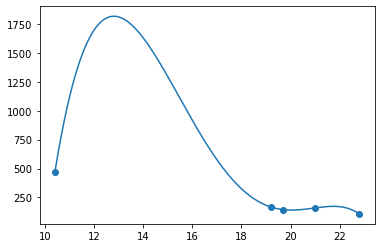

In [13]:
MN.Grafica()

[10.4, 19.2, 22.8, 19.7, 21.0]
[472.0, 167.6, 108.0, 145.0, 160.0]
Polinomio calculado:
-1.24675732901245*x**4 + 90.7283732470005*x**3 - 2419.77998009995*x**2 + 27810.8018441415*x - 114508.720039696


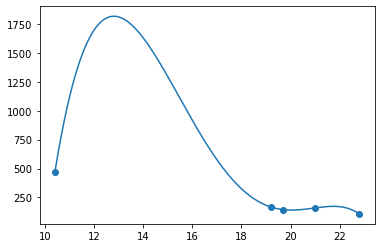

In [19]:
MN = NumMethods(Xs, Ys)
MN.Lagrange()
MN.Grafica()